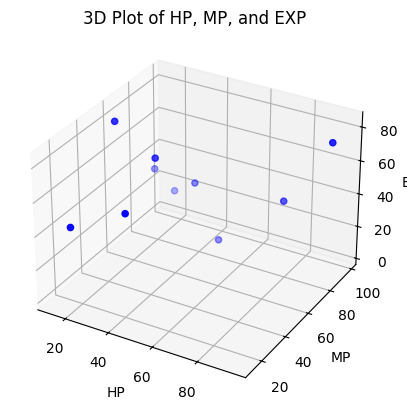

In [1]:
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# データベース接続（必要ならSQLiteファイルパスを指定）
connection = sqlite3.connect(':memory:')
cursor = connection.cursor()

# テーブルの作成とデータ挿入
cursor.execute('''CREATE TABLE player (
    player_id INTEGER,
    fname TEXT,
    lname TEXT,
    points INTEGER,
    rank TEXT
);''')

cursor.execute('''CREATE TABLE character (
    character_id INTEGER,
    character_name TEXT,
    HP INTEGER,
    MP INTEGER,
    EXP INTEGER,
    player_id INTEGER
);''')

cursor.executemany('''INSERT INTO player VALUES (?, ?, ?, ?, ?)''', [
    (1, 'sMBWd', 'Dsvhv', 53, 'B'),
    (2, 'IczjS', 'vmFSp', 45, 'Y')
])

cursor.executemany('''INSERT INTO character VALUES (?, ?, ?, ?, ?, ?)''', [
    (5, 'doraemon', 16, 54, 83, 1),
    (17, 'bikkuriko', 20, 13, 47, 1),
    (21, 'doraemon', 31, 60, 63, 1),
    (86, 'doraemon', 13, 90, 32, 1),
    (44, 'akinator', 39, 23, 56, 2),
    (65, 'doraemon', 33, 89, 31, 2),
    (71, 'bikkuriko', 75, 88, 36, 2),
    (84, 'akinator', 46, 86, 2, 2),
    (88, 'begita', 95, 90, 77, 2),
    (90, 'golgo', 18, 98, 15, 2)
])

# クエリの実行
query = '''
SELECT player.player_id, player.fname, player.lname, player.points, player.rank, 
       character.character_id, character.character_name, character.HP, character.MP, character.EXP 
FROM player 
JOIN character ON player.player_id = character.player_id 
LIMIT 10;'''

cursor.execute(query)
data = cursor.fetchall()

# データフレーム化
columns = ["player_id", "fname", "lname", "points", "rank", "character_id", "character_name", "HP", "MP", "EXP"]
df = pd.DataFrame(data, columns=columns)

# 3Dプロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# HP, MP, EXP の取得
hp = df['HP']
mp = df['MP']
exp = df['EXP']

# 散布図を作成
ax.scatter(hp, mp, exp, c='b', marker='o')

# ラベルとタイトル
ax.set_xlabel('HP')
ax.set_ylabel('MP')
ax.set_zlabel('EXP')
ax.set_title('3D Plot of HP, MP, and EXP')

# グラフ表示
plt.show()

# データベース接続を閉じる
connection.close()
